# UV_LED_GRID_FOR_PHOTOLITHOGRAPGHY

In [1]:
from multiprocessing import Pool
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Functions 

In [2]:
def arrangement_1(nleds,d):
    l=math.sqrt(nleds);
    ledcord=np.zeros((2,nleds));
    temp=0;
    for k in range(nleds):
        ledcord[0,k]=-(l-1)*d/2 +((k)%l)*d;
        if (k)%l ==0 and k != 0:
            temp=temp+1;
        ledcord[1,k]=-(l-1)*d/2 + temp*d;
    return ledcord

def arrangement_2(nleds,d):
    l = (math.sqrt(nleds)-1)/2
    ledcord=np.zeros((2,nleds));
    ledcord[0,0]=0
    ledcord[1,0]=0
    for k in range(1,9):
        ledcord[0,k]=d*np.cos(k*np.pi/4)
        ledcord[1,k]=d*np.sin(k*np.pi/4)
    l=l-1
    if(l<=0):
        return ledcord 
    for k in range(9,25):
        ledcord[0,k]=2*d*np.cos(k*np.pi/8)
        ledcord[1,k]=2*d*np.sin(k*np.pi/8)
    l=l-1
    if(l<=0):
        return ledcord 
    for k in range(25,49):
        ledcord[0,k]=3*d*np.cos(k*np.pi/12)
        ledcord[1,k]=3*d*np.sin(k*np.pi/12)
    l=l-1
    if(l<=0):
        return ledcord 
    for k in range(49,81):
        ledcord[0,k]=4*d*np.cos(k*np.pi/16)
        ledcord[1,k]=4*d*np.sin(k*np.pi/16)
    l=l-1
    if(l<=0):
        return ledcord 
    for k in range(81,121):
        ledcord[0,k]=5*d*np.cos(k*np.pi/20)
        ledcord[1,k]=5*d*np.sin(k*np.pi/20)
    l=l-1
    if(l<=0):
        return ledcord 
        
def arrangement_3(nleds,d):
    l = (math.sqrt(nleds)-1)/2
    ledcord=np.zeros((2,nleds));
    ledcord[0,0]=0
    ledcord[1,0]=0
    for k in range(1,9):
        ledcord[0,k]=np.sqrt(2)*d*np.cos(k*np.pi/4)
        ledcord[1,k]=np.sqrt(2)*d*np.sin(k*np.pi/4)
    l=l-1
    if(l<=0):
        return ledcord 
    for k in range(9,25):
        ledcord[0,k]=np.sqrt(2)*2*d*np.cos(k*np.pi/8)
        ledcord[1,k]=np.sqrt(2)*2*d*np.sin(k*np.pi/8)
    l=l-1
    if(l<=0):
        return ledcord 
    for k in range(25,49):
        ledcord[0,k]=np.sqrt(2)*3*d*np.cos(k*np.pi/12)
        ledcord[1,k]=np.sqrt(2)*3*d*np.sin(k*np.pi/12)
    l=l-1
    if(l<=0):
        return ledcord 
    for k in range(49,81):
        ledcord[0,k]=np.sqrt(2)*4*d*np.cos(k*np.pi/16)
        ledcord[1,k]=np.sqrt(2)*4*d*np.sin(k*np.pi/16)
    l=l-1
    if(l<=0):
        return ledcord 
    for k in range(81,121):
        ledcord[0,k]=np.sqrt(2)*5*d*np.cos(k*np.pi/20)
        ledcord[1,k]=np.sqrt(2)*5*d*np.sin(k*np.pi/20)
    l=l-1
    if(l<=0):
        return ledcord    

def E_r(ledcord,nleds,Ir_0,z,d,r,th):    
    x=r*np.cos(th);    
    y=r*np.sin(th);
    E=0;
    for i in range(nleds):
        den=np.square(np.square(x-ledcord[0,i]) +np.square(y-ledcord[1,i]) +z**2);
        E= E + (z**2 * Ir_0)*(np.reciprocal(den))
    return E

# Arrangement 1 : SQUARE GRID

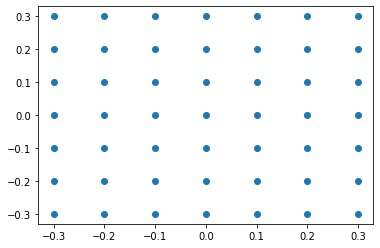

In [3]:
nleds =49
d=0.1
ledcord = arrangement_1(nleds,d)
plt.scatter(ledcord[0,:], ledcord[1,:])

In [4]:
Ir_0 = 0.1
final_list_1 = []

def ratio(d):
    final_list_1 = []
    Ir_0=0.1
    for nleds in [9,25,49,81,121]:
        lled=np.sqrt(nleds)   
        ledcord = arrangement_1(nleds,d)
        nz = round((0.5 - 0.01)/0.001) + 1
        for z in np.linspace(0.01,0.5,nz):
            min_E=1000000;
            max_E=0;
            ni = round((0.04)/0.001) + 1
            for i in np.linspace(0,0.04,ni):
                E_i = E_r(ledcord,nleds,Ir_0,z,d,i,0)
                min_E = min(min_E,E_i)
                max_E = max(max_E,E_i)
            percent_uniformity=(min_E/max_E)*100

            t = 4000/(max_E + min_E)
            energy_max = max_E * t
            energy_min = min_E * t

            final_list_1.append([nleds,d,z,min_E,max_E,t,energy_min/10,energy_max/10,percent_uniformity])
    return final_list_1

with Pool(7) as p:
    l = list(tqdm(p.imap(ratio,np.linspace(0.01,0.2,191)), total=191))

100%|██████████| 191/191 [58:53<00:00, 18.50s/it] 


In [5]:
t_1=[]
for i in l:
    t_1.extend(i)
final_list_1=t_1

In [41]:
#df_1=pd.read_pickle("./df_1.pkl")
df_1 = pd.DataFrame(final_list_1,columns=["nleds","d(m)","z(m)","min_E(W/m^2)","max_E(W/m^2)","exposure_time(s)","energy_min(mJ/cm^2)","energy_max(mJ^cm^2)","percent_uniformity"])
df_1.to_pickle("./df_1.pkl")

## Arrangement 2 : INNER CIRCLE

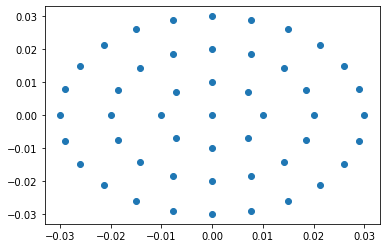

In [7]:
nleds =49
d=0.01
ledcord = arrangement_2(nleds,d)
plt.scatter(ledcord[0,:], ledcord[1,:])

In [8]:
Ir_0 = 0.1
final_list_2 = []

def ratio(d):
    final_list_2 = []
    Ir_0=0.1
    for nleds in [9,25,49,81,121]:
        lled=np.sqrt(nleds)   
        ledcord = arrangement_2(nleds,d)
        nz = round((0.5 - 0.01)/0.001) + 1
        for z in np.linspace(0.01,0.5,nz):
            min_E=1000000;
            max_E=0;
            ni = round((0.04)/0.001) + 1
            for i in np.linspace(0,0.04,ni):
                E_i = E_r(ledcord,nleds,Ir_0,z,d,i,0)
                min_E = min(min_E,E_i)
                max_E = max(max_E,E_i)
            percent_uniformity=(min_E/max_E)*100

            t = 4000/(max_E + min_E)
            energy_max = max_E * t
            energy_min = min_E * t

            final_list_2.append([nleds,d,z,min_E,max_E,t,energy_min/10,energy_max/10,percent_uniformity])
    return final_list_2

with Pool(7) as p:
    l = list(tqdm(p.imap(ratio,np.linspace(0.01,0.2,191)), total=191))

100%|██████████| 191/191 [56:50<00:00, 17.85s/it] 


In [9]:
t_2=[]
for i in l:
    t_2.extend(i)

final_list_2 = t_2

In [40]:
#df_2=pd.read_pickle("./df_2.pkl")
df_2 = pd.DataFrame(final_list_2,columns=["nleds","d(m)","z(m)","min_E(W/m^2)","max_E(W/m^2)","exposure_time(s)","energy_min(mJ/cm^2)","energy_max(mJ^cm^2)","percent_uniformity"])
df_2.to_pickle("./df_2.pkl")

# Arrangement_3 : OUTER CIRCLE

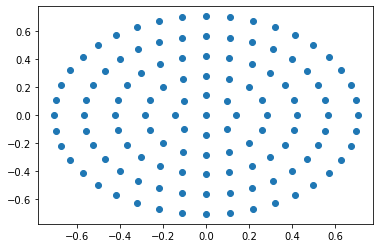

In [11]:
nleds =121
d=0.1
ledcord = arrangement_3(nleds,d)
plt.scatter(ledcord[0,:], ledcord[1,:])

In [12]:
Ir_0 = 0.1
final_list_3 = []

def ratio(d):
    final_list_3 = []
    Ir_0=0.1
    for nleds in [9,25,49,81,121]:
        lled=np.sqrt(nleds)   
        ledcord = arrangement_3(nleds,d)
        nz = round((0.5 - 0.01)/0.001) + 1
        for z in np.linspace(0.01,0.5,nz):
            min_E=1000000;
            max_E=0;
            ni = round((0.04)/0.001) + 1
            for i in np.linspace(0,0.04,ni):
                E_i = E_r(ledcord,nleds,Ir_0,z,d,i,0)
                min_E = min(min_E,E_i)
                max_E = max(max_E,E_i)
            percent_uniformity=(min_E/max_E)*100

            t = 4000/(max_E + min_E)
            energy_max = max_E * t
            energy_min = min_E * t

            final_list_3.append([nleds,d,z,min_E,max_E,t,energy_min/10,energy_max/10,percent_uniformity])
    return final_list_3

with Pool(7) as p:
    l = list(tqdm(p.imap(ratio,np.linspace(0.01,0.2,191)), total=191))

100%|██████████| 191/191 [56:57<00:00, 17.89s/it] 


In [13]:
t_3=[]
for i in l:
    t_3.extend(i)

final_list_3=t_3

In [42]:
#df_3=pd.read_pickle("./df_3.pkl")
df_3 = pd.DataFrame(final_list_3,columns=["nleds","d(m)","z(m)","min_E(W/m^2)","max_E(W/m^2)","exposure_time(s)","energy_min(mJ/cm^2)","energy_max(mJ^cm^2)","percent_uniformity"])
df_3.to_pickle("./df_3.pkl")

# No restrictions on LED grid size

### Maximum_percent_uniformity 

In [15]:
uf_1=df_1[df_1['exposure_time(s)']<40]
uf_2=df_2[df_2['exposure_time(s)']<40]
uf_3=df_3[df_3['exposure_time(s)']<40]

In [43]:
idx = uf_1.groupby(['nleds'])['percent_uniformity'].transform(max) == uf_1['percent_uniformity']
uf_1[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
135091,9,0.065,0.076,48.187549,51.828599,39.993542,192.719074,207.280926,92.974823
150334,25,0.071,0.098,49.634299,50.453790,39.964795,198.362461,201.637539,98.375759
155756,49,0.073,0.119,49.990795,50.281890,39.891223,199.419394,200.580606,99.421075
161166,81,0.075,0.128,49.943164,50.073112,39.993491,199.740147,200.259853,99.740484
164121,121,0.076,0.137,49.984626,50.052484,39.985162,199.864335,200.135665,99.864427


In [17]:
idx = uf_2.groupby(['nleds'])['percent_uniformity'].transform(max) == uf_2['percent_uniformity']
uf_2[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
162097,9,0.076,0.077,48.540840,51.486373,39.989118,194.110536,205.889464,94.279004
179791,25,0.083,0.095,49.721430,50.379963,39.959484,198.684269,201.315731,98.692868
185205,49,0.085,0.108,50.563465,50.828017,39.451046,199.478157,200.521843,99.479515
190613,81,0.087,0.115,50.207113,50.353956,39.776824,199.707952,200.292048,99.708378
193563,121,0.088,0.119,50.211111,50.315491,39.790462,199.792334,200.207666,99.792550


In [18]:
idx = uf_3.groupby(['nleds'])['percent_uniformity'].transform(max) == uf_3['percent_uniformity']
uf_3[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
105634,9,0.053,0.079,48.567781,51.524682,39.963049,194.091662,205.908338,94.261196
118419,25,0.058,0.098,50.076719,50.741097,39.675527,198.682023,201.317977,98.690651
123829,49,0.060,0.107,50.837448,51.104145,39.238155,199.476764,200.523236,99.478129
126781,81,0.061,0.113,51.148298,51.299856,39.044139,199.704127,200.295873,99.704564
129732,121,0.062,0.118,50.611068,50.716881,39.475782,199.791147,200.208853,99.791365


### Minimum_exposure_time 

In [19]:
ef_1=df_1[df_1['percent_uniformity']>99]
ef_2=df_2[df_2['percent_uniformity']>99]
ef_3=df_3[df_3['percent_uniformity']>99]

In [20]:
idx = ef_1.groupby(['nleds'])['exposure_time(s)'].transform(min) == ef_1['exposure_time(s)']
ef_1[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
407769,9,0.176,0.249,6.034938,6.095878,329.738733,198.995277,201.004723,99.000299
201929,25,0.092,0.138,28.695536,28.985091,69.347373,198.996007,201.003993,99.001022
94323,49,0.048,0.061,122.840000,124.072012,16.200103,199.002065,200.997935,99.007019
57969,81,0.033,0.041,270.900817,273.583297,7.346404,199.014671,200.985329,99.019502
38814,121,0.025,0.035,474.073674,478.809737,4.197785,199.005951,200.994049,99.010867


In [21]:
idx = ef_2.groupby(['nleds'])['exposure_time(s)'].transform(min) == ef_2['exposure_time(s)']
ef_2[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
442113,9,0.190,0.223,7.337314,7.411370,271.210635,198.995772,201.004228,99.000789
214182,25,0.097,0.116,35.907281,36.269619,55.419393,198.995972,201.004028,99.000987
89400,49,0.046,0.048,180.004848,181.676114,11.059471,199.075834,200.924166,99.080085
75154,81,0.040,0.041,246.105731,248.427626,8.088433,199.060975,200.939025,99.065363
73188,121,0.039,0.039,263.644068,266.287969,7.548138,199.002174,200.997826,99.007127


In [22]:
idx = ef_3.groupby(['nleds'])['exposure_time(s)'].transform(min) == ef_3['exposure_time(s)']
ef_3[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
304634,9,0.134,0.224,7.335261,7.409261,271.287193,198.996246,201.003754,99.001259
145442,25,0.069,0.116,35.566516,35.923585,55.951803,199.001068,200.998932,99.006032
55029,49,0.032,0.047,186.115658,187.900735,10.694718,199.045455,200.954545,99.049989
45693,81,0.028,0.040,251.647068,254.092827,7.909204,199.032800,200.967200,99.037454
46184,121,0.028,0.040,255.595756,257.937502,7.789174,199.087987,200.912013,99.092127


# Restrictions on LED grid size

In [23]:
grid_size=0.3
df_1_3 = df_1[(np.sqrt(df_1["nleds"])-1) * df_1["d(m)"] <= grid_size]
df_2_3 = df_2[(np.sqrt(df_1["nleds"])-1) * df_2["d(m)"] <= grid_size]
df_3_3 = df_3[(np.sqrt(df_1["nleds"])-1) * df_3["d(m)"] <= grid_size]

### Maximum_percent_uniformity 

In [44]:
uf_1_3=df_1_3[df_1_3['exposure_time(s)']<40]
uf_2_3=df_2_3[df_2_3['exposure_time(s)']<40]
uf_3_3=df_3_3[df_3_3['exposure_time(s)']<40]

In [45]:
idx = uf_1_3.groupby(['nleds'])['percent_uniformity'].transform(max) == uf_1_3['percent_uniformity']
uf_1_3[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
135091,9,0.065,0.076,48.187549,51.828599,39.993542,192.719074,207.280926,92.974823
150334,25,0.071,0.098,49.634299,50.453790,39.964795,198.362461,201.637539,98.375759
96780,49,0.049,0.063,117.565609,118.735462,16.927558,199.009863,200.990137,99.014741
67796,81,0.037,0.048,214.731593,216.100719,9.284355,199.364427,200.635573,99.366441
51099,121,0.030,0.045,327.476602,329.699808,6.086646,199.323407,200.676593,99.325688


In [52]:
idx = uf_2_3.groupby(['nleds'])['percent_uniformity'].transform(max) == uf_2_3['percent_uniformity']
uf_2_3[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
162097,9,0.076,0.077,48.540840,51.486373,39.989118,194.110536,205.889464,94.279004
160143,25,0.075,0.087,60.467780,61.389781,32.825210,198.486756,201.513244,98.498120
96769,49,0.049,0.052,158.187333,159.525443,12.589988,199.157661,200.842339,99.161194
67784,81,0.037,0.036,288.348194,292.838564,6.882469,198.454758,201.545242,98.466606
51516,121,0.030,0.462,49.773949,50.365197,39.944419,198.819147,201.180853,98.826079


In [47]:
idx = uf_3_3.groupby(['nleds'])['percent_uniformity'].transform(max) == uf_3_3['percent_uniformity']
uf_3_3[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
105634,9,0.053,0.079,48.567781,51.524682,39.963049,194.091662,205.908338,94.261196
118419,25,0.058,0.098,50.076719,50.741097,39.675527,198.682023,201.317977,98.690651
96798,49,0.049,0.081,77.524956,78.056103,25.710070,199.317208,200.682792,99.319532
67807,81,0.037,0.059,142.370936,143.011954,14.016257,199.550766,200.449234,99.551773
51100,121,0.030,0.046,221.428871,222.691632,9.006565,199.431343,200.568657,99.432955


### Minimum_exposure_time 

In [48]:
ef_1_3=df_1_3[df_1_3['percent_uniformity']>99]
ef_2_3=df_2_3[df_2_3['percent_uniformity']>99]
ef_3_3=df_3_3[df_3_3['percent_uniformity']>99]

In [49]:
idx = ef_1_3.groupby(['nleds'])['exposure_time(s)'].transform(min) == ef_1_3['exposure_time(s)']
ef_1_3[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
341650,9,0.149,0.415,3.832370,3.871068,519.248622,198.995302,201.004698,99.000324
160525,25,0.075,0.469,9.344227,9.438445,212.962242,198.996753,201.003247,99.001761
94323,49,0.048,0.061,122.840000,124.072012,16.200103,199.002065,200.997935,99.007019
57969,81,0.033,0.041,270.900817,273.583297,7.346404,199.014671,200.985329,99.019502
38814,121,0.025,0.035,474.073674,478.809737,4.197785,199.005951,200.994049,99.010867


In [50]:
idx = ef_2_3.groupby(['nleds'])['exposure_time(s)'].transform(min) == ef_2_3['exposure_time(s)']
ef_2_3[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
341711,9,0.149,0.476,3.336489,3.370111,596.427429,198.997355,201.002645,99.002356
160554,25,0.075,0.498,8.821286,8.910375,225.585193,198.995144,201.004856,99.000168
89400,49,0.046,0.048,180.004848,181.676114,11.059471,199.075834,200.924166,99.080085


In [51]:
idx = ef_3_3.groupby(['nleds'])['exposure_time(s)'].transform(min) == ef_3_3['exposure_time(s)']
ef_3_3[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
304634,9,0.134,0.224,7.335261,7.409261,271.287193,198.996246,201.003754,99.001259
145442,25,0.069,0.116,35.566516,35.923585,55.951803,199.001068,200.998932,99.006032
55029,49,0.032,0.047,186.115658,187.900735,10.694718,199.045455,200.954545,99.049989
45693,81,0.028,0.040,251.647068,254.092827,7.909204,199.032800,200.967200,99.037454
46184,121,0.028,0.040,255.595756,257.937502,7.789174,199.087987,200.912013,99.092127


## Constant z with restricted LED Grid size 

In [31]:
z_cons = 0.35
df_1_3_z= df_1_3[(df_1_3["z(m)"]==z_cons) | (np.isclose(df_1_3["z(m)"],z_cons ))]
df_2_3_z= df_2_3[(df_2_3["z(m)"]==z_cons) | (np.isclose(df_2_3["z(m)"],z_cons ))]
df_3_3_z= df_3_3[(df_3_3["z(m)"]==z_cons) | (np.isclose(df_3_3["z(m)"],z_cons ))]

 ### Maximum_percent_uniformity

In [55]:
uf_1_3_z=df_1_3_z[df_1_3_z['exposure_time(s)']<40]
uf_2_3_z=df_2_3_z[df_2_3_z['exposure_time(s)']<40]
uf_3_3_z=df_3_3_z[df_3_3_z['exposure_time(s)']<40]

In [56]:
idx_z = uf_1_3_z.groupby(['nleds'])['percent_uniformity'].transform(max) == uf_1_3_z['percent_uniformity']
uf_1_3_z[idx_z].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
68098,81,0.037,0.35,50.249345,51.041904,39.490084,198.435089,201.564911,98.447239
51404,121,0.030,0.35,75.306777,76.503038,26.348757,198.424001,201.575999,98.436323


In [57]:
idx = uf_2_3_z.groupby(['nleds'])['percent_uniformity'].transform(max) == uf_2_3_z['percent_uniformity']
uf_2_3_z[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
68098,81,0.037,0.35,53.206254,54.144005,37.261205,198.252914,201.747086,98.268044
51404,121,0.030,0.35,79.627403,81.036719,24.896660,198.245637,201.754363,98.260892


In [58]:
idx = uf_3_3_z.groupby(['nleds'])['percent_uniformity'].transform(max) == uf_3_3_z['percent_uniformity']
uf_3_3_z[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
53368,81,0.031,0.35,49.685202,50.444946,39.948008,198.482488,201.517512,98.493915
51404,121,0.030,0.35,67.820403,68.682046,29.303504,198.737542,201.262458,98.745461


### Minimum_exposure_time

In [35]:
ef_1_3_z=df_1_3_z[df_1_3_z['percent_uniformity']>98]
ef_2_3_z=df_2_3_z[df_2_3_z['percent_uniformity']>98]
ef_3_3_z=df_3_3_z[df_3_3_z['percent_uniformity']>98]

In [36]:
idx = ef_1_3_z.groupby(['nleds'])['exposure_time(s)'].transform(min) == ef_1_3_z['exposure_time(s)']
ef_1_3_z[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
169735,9,0.079,0.35,6.333506,6.462052,312.608468,197.990775,202.009225,98.010759
89211,25,0.046,0.35,17.576219,17.933495,112.645232,197.987728,202.012272,98.007772
57787,49,0.033,0.35,34.341445,35.035604,57.655955,197.998880,202.001120,98.018704
41093,81,0.026,0.35,56.542376,57.676366,35.020522,198.014354,201.985646,98.033874
29309,121,0.021,0.35,84.691160,86.399356,23.379437,198.003168,201.996832,98.022908


In [37]:
idx = ef_2_3_z.groupby(['nleds'])['exposure_time(s)'].transform(min) == ef_2_3_z['exposure_time(s)']
ef_2_3_z[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
209015,9,0.095,0.35,6.352324,6.481451,311.677585,197.987701,202.012299,98.007746
108851,25,0.054,0.35,17.579138,17.935689,112.629015,197.992100,202.007900,98.012058
70062,49,0.038,0.35,34.423347,35.120923,57.517320,197.993865,202.006135,98.013788
48458,81,0.029,0.35,57.053112,58.216047,34.701390,197.982226,202.017774,98.002380
36674,121,0.024,0.35,84.923997,86.642509,23.314574,197.996681,202.003319,98.016548


In [38]:
idx = ef_3_3_z.groupby(['nleds'])['exposure_time(s)'].transform(min) == ef_3_3_z['exposure_time(s)']
ef_3_3_z[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
140275,9,0.067,0.35,6.356127,6.485502,311.486963,197.985069,202.014931,98.005166
69571,25,0.038,0.35,17.598878,17.956675,112.500008,197.987392,202.012608,98.007443
43057,49,0.027,0.35,34.384220,35.079347,57.584143,197.998585,202.001415,98.018415
28818,81,0.021,0.35,56.735173,57.878220,34.899935,198.005388,201.994612,98.025084
19489,121,0.017,0.35,84.889199,86.605540,23.324331,197.998374,202.001626,98.018208
